In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.sparse import random

# Решение СЛАУ. Метод Гаусса-Зейделя

Число неизвестных

In [173]:
n = 110

In [193]:
A0 = Matrix(random(n, n, density=0.3).A + n * np.eye(n, n))

In [194]:
A = A0.transpose() * A0

Решение

In [195]:
sol_exact = Matrix([1 for _ in range(n)])

In [196]:
b = A * sol_exact

Диагональная составляющая

In [197]:
D = Matrix(DiagMatrix(A.diagonal()))

Нижнетреугольная составляющая

In [198]:
L = A.lower_triangular() - D

Верхнетреугольная составлющая

In [199]:
U = A.upper_triangular() - D

In [200]:
S = -(L + D).inv() * U

In [201]:
c = (L + D).inv() * b

Приближенное решение

In [202]:
sol = Matrix([100 for _ in range(n)])

In [203]:
err = np.inf

In [204]:
errs = []

In [205]:
k = 0

while err > 0.001:
    sol = S * sol + c
    err = np.linalg.norm(sol - sol_exact, np.inf)
    k += 1
    errs.append(err)
k

6

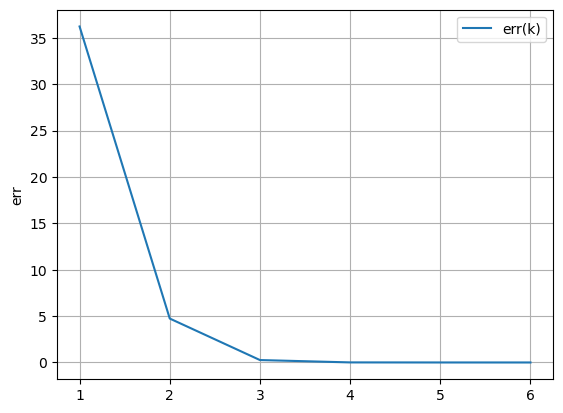

In [210]:
plt.plot(np.arange(1, k + 1), errs, label='err(k)')
plt.ylabel('k')
plt.ylabel('err')
plt.legend()
plt.grid(True)

Чем выше доля ненулевых элементов, тем большее количество итераций требуется